In [1]:
#1. Consider the columns, ‘RM’, ‘DIS’, ‘TAX’, ‘INDUS’ as predictors, and ‘MEDV’ as the target variable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

data=pd.read_csv('dataset/boston_housing.csv')
x=data[['RM', 'DIS', 'TAX', 'INDUS']]
y=data['MEDV']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error and the coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")




Mean Squared Error: 37.88490702777809
R^2 Score: 0.4833908003224956


In [5]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
data = pd.read_csv('dataset/boston_housing.csv')

# Select predictors and target variable
X = data[['RM', 'DIS', 'TAX', 'INDUS']]
y = data['MEDV']

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


  feature        VIF
0      RM  16.747965
1     DIS   6.880607
2     TAX  13.861510
3   INDUS   9.598374


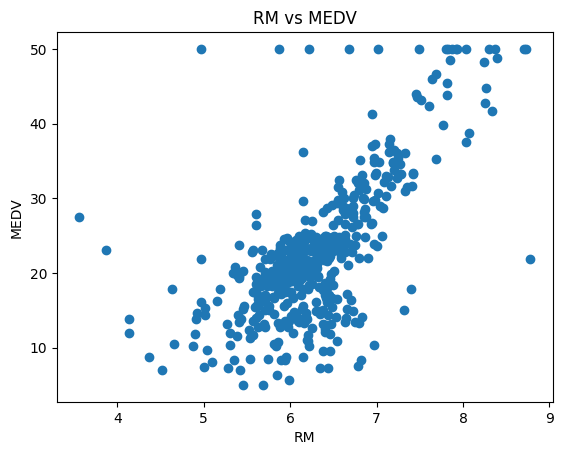

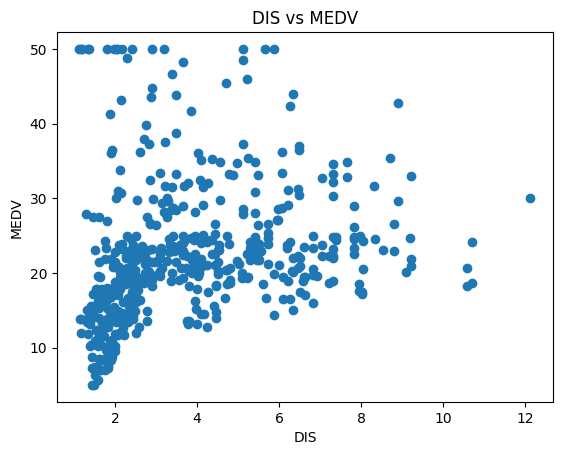

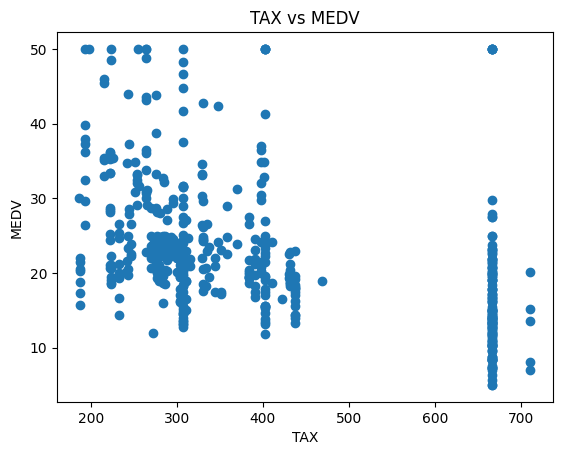

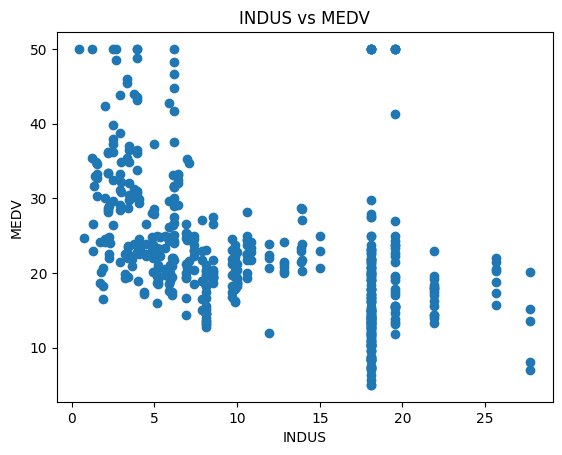

In [6]:
import matplotlib.pyplot as plt

# Visualize the relationship between each predictor and the target variable
for column in X.columns:
    plt.scatter(X[column], y)
    plt.title(f'{column} vs MEDV')
    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a 67:33 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train)

        RM     DIS  TAX  INDUS
478  6.185  2.1705  666  18.10
26   5.813  4.6820  307   8.14
7    6.172  5.9505  311   7.87
492  5.983  2.1099  711  27.74
108  6.474  2.4329  384   8.56
..     ...     ...  ...    ...
106  5.836  2.2110  384   8.56
270  5.856  4.4290  223   6.96
348  6.635  8.3440  280   2.01
435  6.629  2.1247  666  18.10
102  6.405  2.7147  384   8.56

[339 rows x 4 columns]


In [8]:
# Get the coefficient and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Intercept: {intercept}")
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")


Intercept: -18.4888597561976
Coefficients:
RM: 8.035960535176002
DIS: -0.4694926938729933
TAX: -0.014572771005466056
INDUS: -0.16322811849724903


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R^2 for the test set
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Calculate MSE and R^2 for the train set
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Adjusted R-squared calculation
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

n_train = X_train.shape[0]
k = X_train.shape[1]
adj_r2_train = adjusted_r2(r2_train, n_train, k)

n_test = X_test.shape[0]
adj_r2_test = adjusted_r2(r2_test, n_test, k)

print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R^2 Score: {r2_train}")
print(f"Train Adjusted R^2 Score: {adj_r2_train}")

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R^2 Score: {r2_test}")
print(f"Test Adjusted R^2 Score: {adj_r2_test}")


ValueError: Found input variables with inconsistent numbers of samples: [167, 102]